<a href="https://colab.research.google.com/github/abhinay0609/personality_prediction_from_Social_Media/blob/main/Understanding_c_and_gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Understanding c and gamma parameters

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Create a toy dataset (moons = non-linear)
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# Varying c

C_values = [0.01, 1, 100]

for c in C_values:
    model = SVC(kernel='rbf', C=c, gamma='scale')
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"C = {c} | Accuracy: {score:.2f}")


C = 0.01 | Accuracy: 0.42
C = 1 | Accuracy: 0.97
C = 100 | Accuracy: 0.99


In [9]:
# varying gamma

gamma_values = [0.01, 1, 10]

for g in gamma_values:
    model = SVC(kernel='rbf', C=1, gamma=g)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Gamma = {g} | Accuracy: {score:.2f}")


Gamma = 0.01 | Accuracy: 0.89
Gamma = 1 | Accuracy: 0.98
Gamma = 10 | Accuracy: 0.98


In [10]:
# Let’s visualize how C and gamma affect the SVM decision boundary using plots

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plotting function
def plot_svm_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()


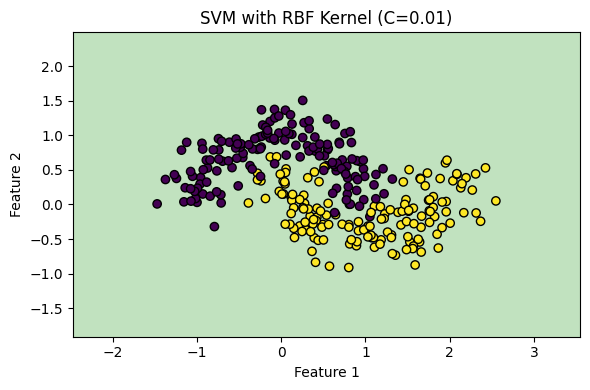

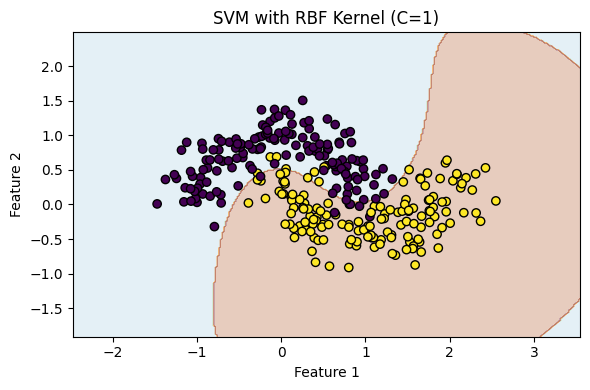

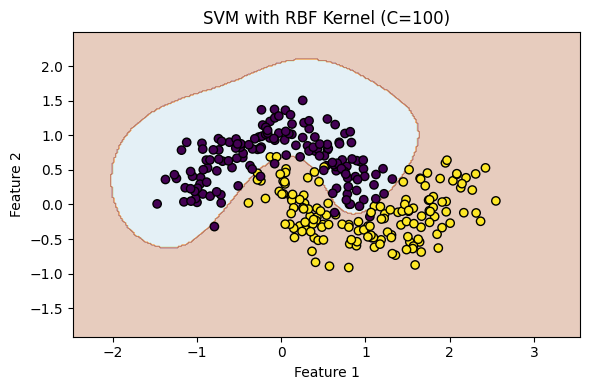

In [11]:
# Visualize Varying C (keep gamma=scale)

C_values = [0.01, 1, 100]

for c in C_values:
    model = SVC(kernel='rbf', C=c, gamma='scale')
    model.fit(X_train, y_train)
    plot_svm_decision_boundary(model, X, y, f"SVM with RBF Kernel (C={c})")



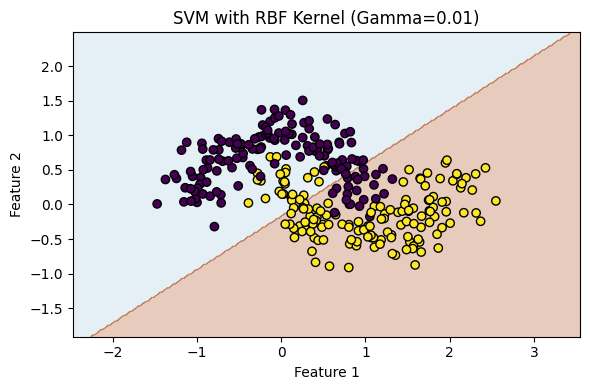

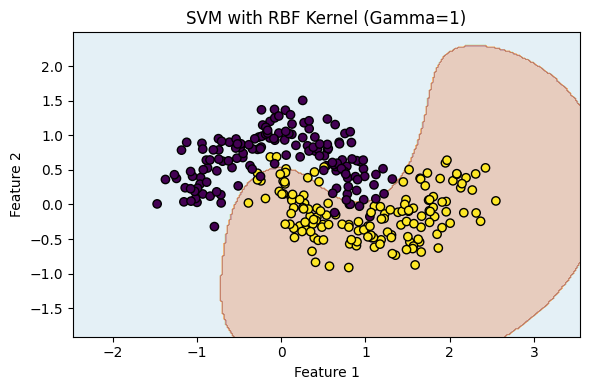

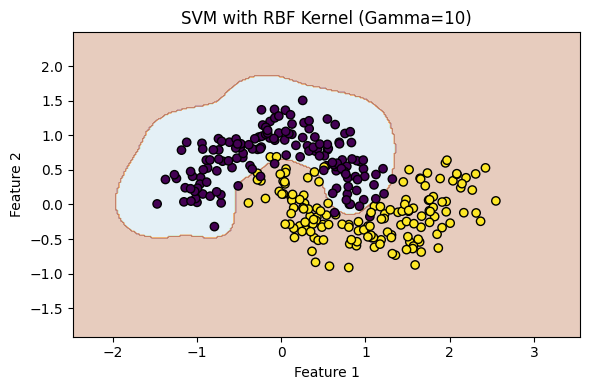

In [12]:
#  Visualize Varying gamma (keep C=1)

gamma_values = [0.01, 1, 10]

for g in gamma_values:
    model = SVC(kernel='rbf', C=1, gamma=g)
    model.fit(X_train, y_train)
    plot_svm_decision_boundary(model, X, y, f"SVM with RBF Kernel (Gamma={g})")
